In [26]:
import numpy as np
from datasets import Dataset
import matplotlib.pyplot as plt
from question_answering.utils import core_qa_utils
from question_answering.paths import generative_qa_paths

In [2]:
df_train, df_val, df_test = core_qa_utils.load_datasets_from_csv(
    generative_qa_paths.python_dataset_dir
)

df_test = np.array_split(df_test, 2)[0]

test_dataset = core_qa_utils.convert_dataframes_to_datasets(
    [df_test]
)[0]

c:\Users\Artur\.conda\envs\question_answering\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [3]:
test_dataset

Dataset({
    features: ['index', 'questions', 'answers', 'code', 'original_code'],
    num_rows: 1250
})

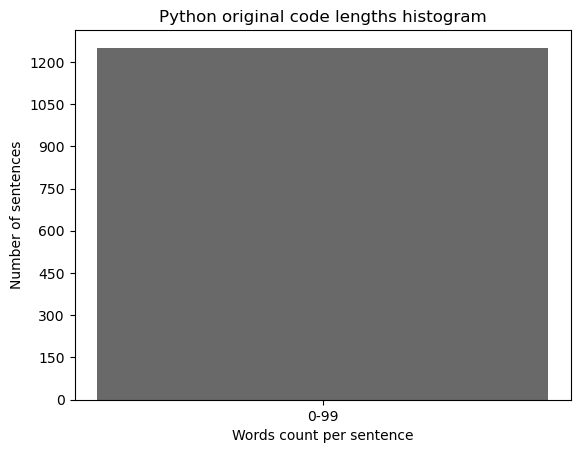

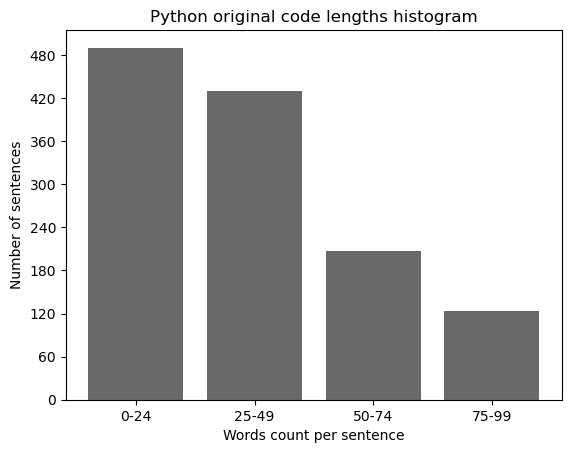

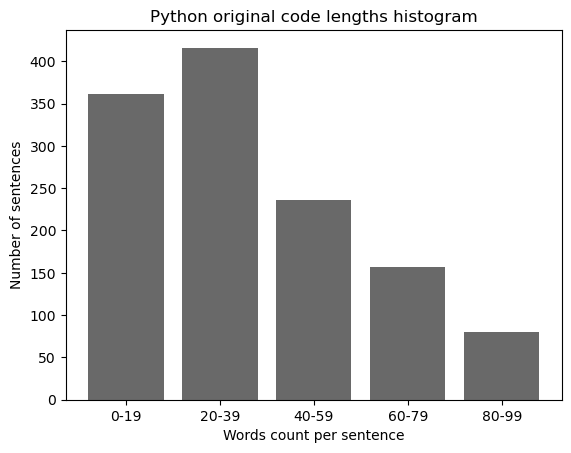

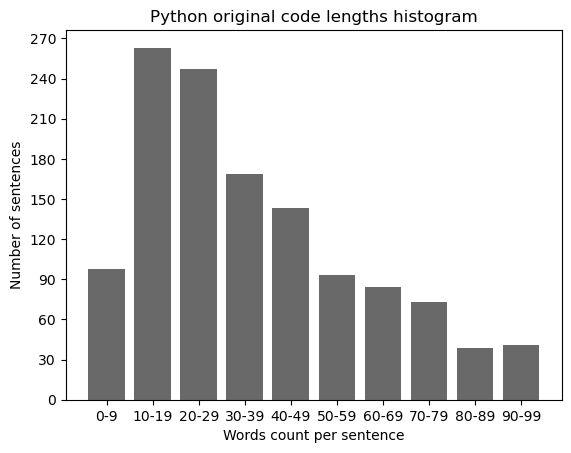

In [4]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_200_100.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=200,
    divider=100,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_100_25.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=25,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_100_20.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=20,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_100_10.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=10,
)

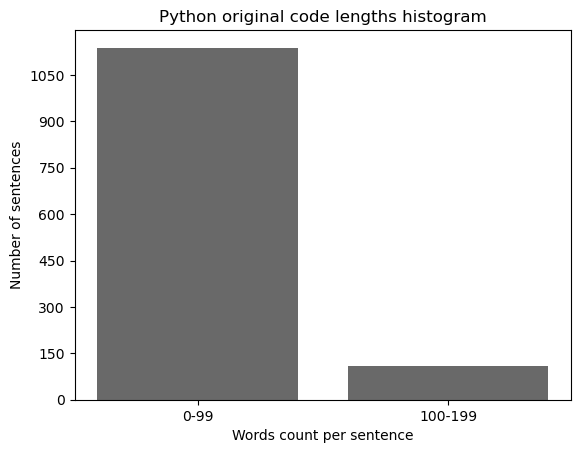

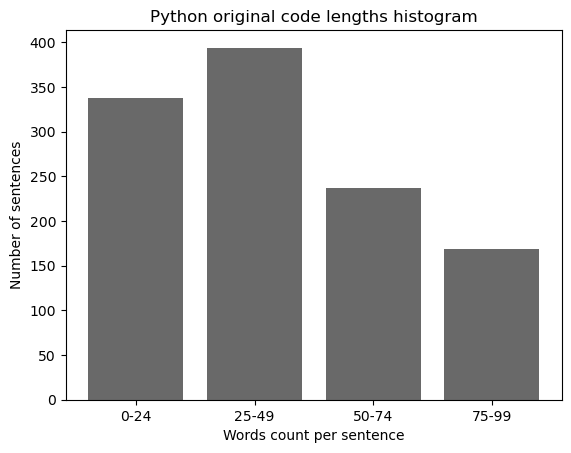

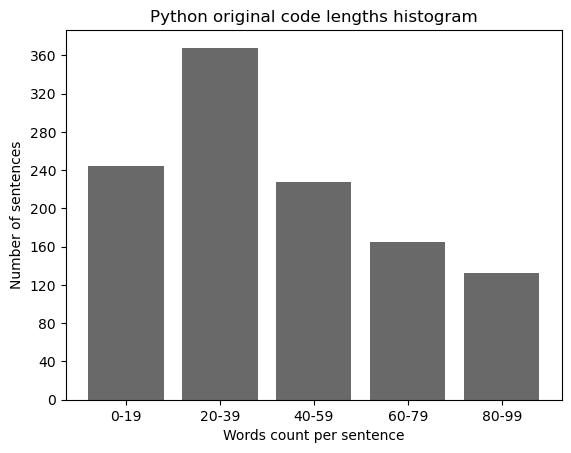

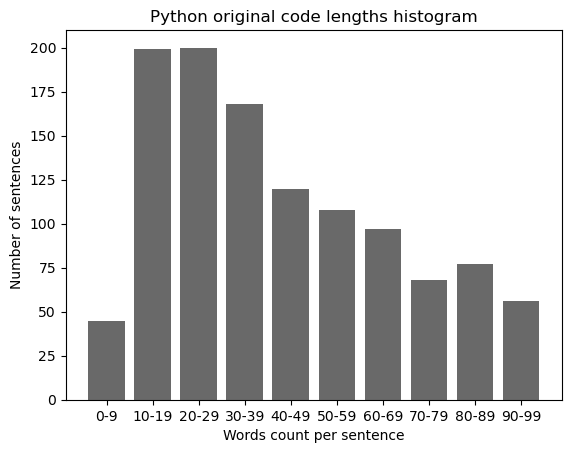

In [5]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_200_100.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=200,
    divider=100,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_200_100.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=25,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_200_100.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=20,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_200_100.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=10,
)

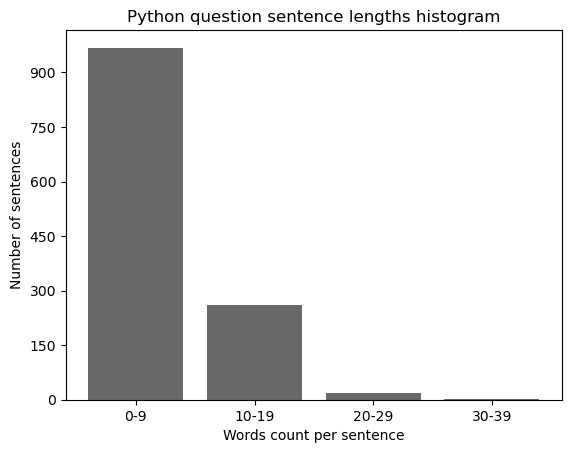

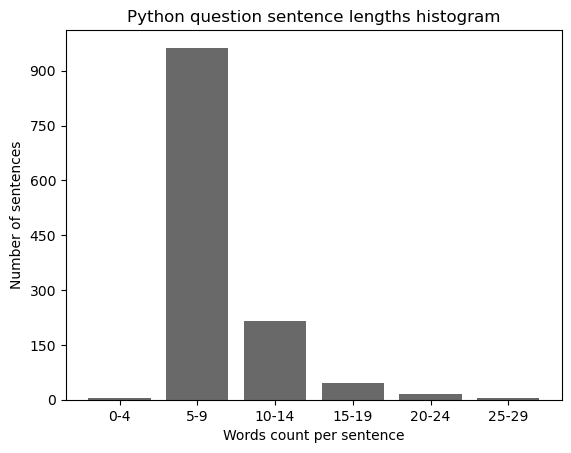

In [6]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["questions"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_question_sentence_lengths_histogram_0_50_10.png",
    figure_title="Python question sentence lengths histogram",
    min_threshold=0,
    max_threshold=50,
    divider=10,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["questions"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_question_sentence_lengths_histogram_0_30_5.png",
    figure_title="Python question sentence lengths histogram",
    min_threshold=0,
    max_threshold=30,
    divider=5,
)

# Question types

In [7]:
test_dataset

Dataset({
    features: ['index', 'questions', 'answers', 'code', 'original_code'],
    num_rows: 1250
})

In [9]:
questions = test_dataset['questions']
questions = [question.lower() for question in questions]
questions

['how does the code add a user in the given buckets default object access control list ?',
 'does the code add a user in the given buckets default object access control list as an owner ?',
 'where does the code add a user as an owner ?',
 'does the code create a simple sdist tarball at dist_path ?',
 'how does the code create a simple sdist tarball ?',
 'what does the code create at dist_path ?',
 'where does le dirs set ?',
 'does le dirs set in parent_dir ?',
 'what sets in parent_dir ?',
 'does the code get the key for a location in a policy file ?',
 'what does the code get ?',
 'does the code remove an user from an object like ?',
 'how does the code remove an user from an object ?',
 'what does the code ensure ?',
 'when are all associated messagecategories deleted ?',
 'does the code ensure ?',
 'does the code run a command on the operation system ?',
 'what does the code run ?',
 'does none mean ?',
 'what does none mean ?',
 'what returns along an axis ?',
 'does the index of

In [19]:
def count_questions_per_type(
        dataset: Dataset
):
    question_numbers_per_type = {}
    question_type_list = ['what', 'where', 'how', 'for what', 'when']
    sum = 0
    for question_type in question_type_list:
        questions = dataset['questions']
        questions = [question.lower() for question in questions]

        questions_number = len(list(filter(lambda x: x.startswith(question_type), questions)))
        sum = sum + questions_number
        question_numbers_per_type.update({
            question_type: questions_number
        })

    rows_with_closed_questions = dataset.filter(
        lambda row: row['answers'] == 'Yes' or row['answers'] == 'No'
    )
    closed_questions_number = len(rows_with_closed_questions)
    sum = sum + closed_questions_number
    question_numbers_per_type.update({
            'closed': closed_questions_number
        })

    others_number = len(dataset) - sum
    question_numbers_per_type.update({
            'others': others_number
        })

    return question_numbers_per_type

question_numbers_per_type = count_questions_per_type(test_dataset)

Filter:   0%|          | 0/1250 [00:00<?, ? examples/s]

{'what': 885,
 'where': 60,
 'how': 102,
 'for what': 37,
 'when': 35,
 'closed': 118,
 'others': 13}

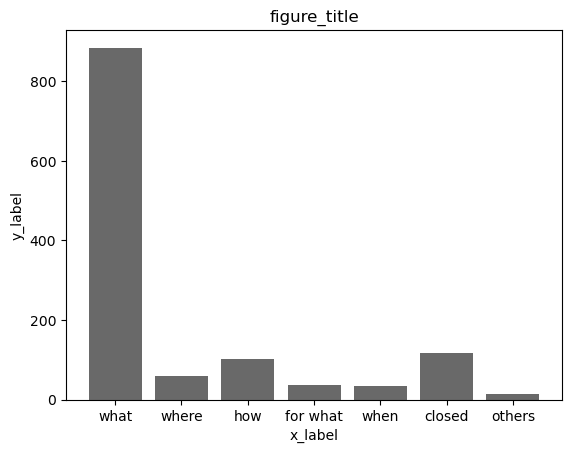

In [28]:
names = list(question_numbers_per_type.keys())
values = list(question_numbers_per_type.values())

plt.bar(range(len(question_numbers_per_type)), values, tick_label=names, color="dimgray")
plt.title("figure_title")
plt.xlabel("x_label")
plt.ylabel("y_label")

figure_path = generative_qa_paths.general_figures_dir/ "test" / "test_python_question_numbers_per_questions_type.png"

if not figure_path.parent.is_dir():
    figure_path.parent.mkdir(parents=True)

plt.savefig(figure_path)
plt.show()